Epoch 0, Cost: 17427.8257
Epoch 100, Cost: 7925.4051
Epoch 200, Cost: 6959.2427
Epoch 300, Cost: 6813.1907
Epoch 400, Cost: 6785.0371
Epoch 500, Cost: 6776.1633
Epoch 600, Cost: 6771.2297
Epoch 700, Cost: 6767.5995
Epoch 800, Cost: 6764.7053
Epoch 900, Cost: 6762.3530

Final Parameters: [112.26934017  70.20543982  37.86216041   1.83413587]


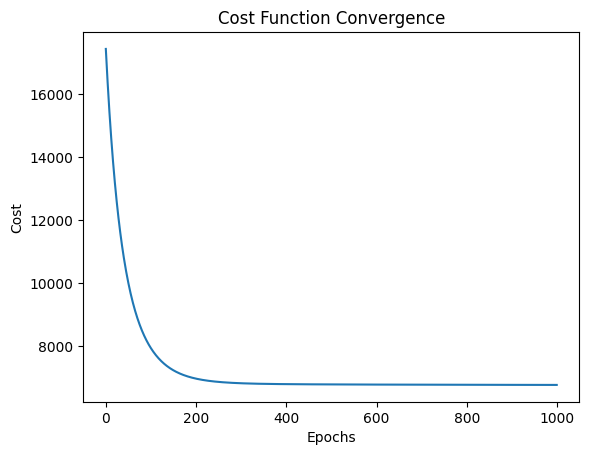


Predicted price: [84438.18971149]


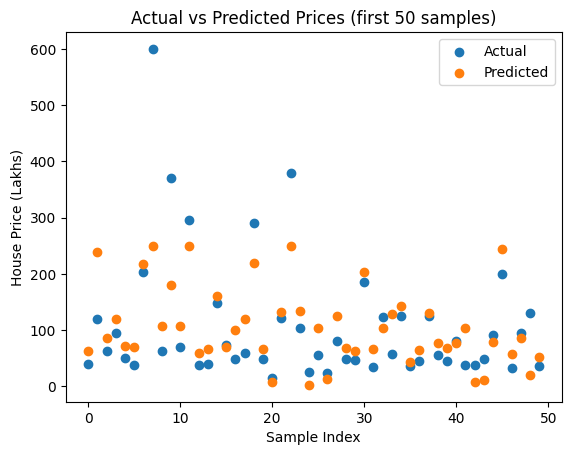

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load dataset
df = pd.read_csv("/content/Bengaluru_House_Data.csv")


# Select useful numerical columns (example: total_sqft, bath, bhk)
# Some preprocessing


df = df.dropna(subset=["size", "total_sqft", "bath", "price"])
df["bhk"] = df["size"].apply(lambda x: int(x.split(' ')[0]))


# Handle 'total_sqft' ranges like '2100 - 2850'
def convert_sqft(x):
    try:
        if '-' in str(x):
            nums = list(map(float, x.split('-')))
            return (nums[0] + nums[1]) / 2
        return float(x)
    except:
        return np.nan


df["total_sqft"] = df["total_sqft"].apply(convert_sqft)
df = df.dropna(subset=["total_sqft"])


# Features (X) and Target (y)
X = df[["total_sqft", "bath", "bhk"]].values
y = df["price"].values.reshape(-1, 1)


# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)


# Add intercept term
X = np.c_[np.ones(X.shape[0]), X]


# Gradient Descent Implementation
def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_history = []


    for i in range(epochs):
        y_pred = X.dot(theta)
        error = y_pred - y
        gradients = (1/m) * X.T.dot(error)
        theta -= lr * gradients
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)


        if i % 100 == 0:
            print(f"Epoch {i}, Cost: {cost:.4f}")


    return theta, cost_history


# Train model
theta, cost_history = gradient_descent(X, y, lr=0.01, epochs=1000)
print("\nFinal Parameters:", theta.ravel())


# Plot cost vs epochs
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()


# Prediction function
def predict(features):
    # normalize with training data stats
    features = (features - X[:,1:].mean(axis=0)) / X[:,1:].std(axis=0)
    features = np.insert(features, 0, 1)  # add intercept
    return features.dot(theta)


# Example prediction: [total_sqft, bath, bhk]
print("\nPredicted price:", predict(np.array([1200, 2, 2])))


# Compare predicted vs actual for first 50 samples
y_pred_all = X.dot(theta)
plt.scatter(range(50), y[:50], label="Actual")
plt.scatter(range(50), y_pred_all[:50], label="Predicted")
plt.xlabel("Sample Index")
plt.ylabel("House Price (Lakhs)")
plt.title("Actual vs Predicted Prices (first 50 samples)")
plt.legend()
plt.show()
